In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.



['mnist-data-set', 'digit-recognizer']


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


In [40]:
# Load the data
train = pd.read_csv("../input/mnist-data-set/train.csv")
test = pd.read_csv("../input/mnist-data-set/test.csv")


In [41]:
X_train = train.drop(labels = ["label"],axis = 1)
Y_train = train["label"]

In [42]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [43]:
X_train.isnull().any()

pixel0      False
pixel1      False
pixel2      False
pixel3      False
pixel4      False
pixel5      False
pixel6      False
pixel7      False
pixel8      False
pixel9      False
pixel10     False
pixel11     False
pixel12     False
pixel13     False
pixel14     False
pixel15     False
pixel16     False
pixel17     False
pixel18     False
pixel19     False
pixel20     False
pixel21     False
pixel22     False
pixel23     False
pixel24     False
pixel25     False
pixel26     False
pixel27     False
pixel28     False
pixel29     False
            ...  
pixel754    False
pixel755    False
pixel756    False
pixel757    False
pixel758    False
pixel759    False
pixel760    False
pixel761    False
pixel762    False
pixel763    False
pixel764    False
pixel765    False
pixel766    False
pixel767    False
pixel768    False
pixel769    False
pixel770    False
pixel771    False
pixel772    False
pixel773    False
pixel774    False
pixel775    False
pixel776    False
pixel777    False
pixel778  

In [44]:
X_train = X_train / 255.0
test = test / 255.0
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [45]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [46]:

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=10)

In [47]:
model_1 = Sequential()

model_1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model_1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_1.add(MaxPool2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))


model_1.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_1.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_1.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_1.add(Dropout(0.25))


model_1.add(Flatten())
model_1.add(Dense(256, activation = "relu"))
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation = "softmax"))


In [48]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [49]:
model_1.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [50]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [51]:
history_RMSProp = model_1.fit(X_train, Y_train, batch_size = 128, epochs = 5,
         validation_data = (X_val, Y_val), verbose = 2)


Train on 33600 samples, validate on 8400 samples
Epoch 1/5
 - 3s - loss: 0.3055 - acc: 0.9009 - val_loss: 0.0915 - val_acc: 0.9701
Epoch 2/5
 - 2s - loss: 0.0801 - acc: 0.9759 - val_loss: 0.0416 - val_acc: 0.9856
Epoch 3/5
 - 2s - loss: 0.0594 - acc: 0.9830 - val_loss: 0.0334 - val_acc: 0.9887
Epoch 4/5
 - 2s - loss: 0.0494 - acc: 0.9857 - val_loss: 0.0280 - val_acc: 0.9921
Epoch 5/5
 - 2s - loss: 0.0416 - acc: 0.9876 - val_loss: 0.0301 - val_acc: 0.9906


In [52]:
model_2 = Sequential()

model_2.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model_2.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_2.add(MaxPool2D(pool_size=(2,2)))
model_2.add(Dropout(0.5))


model_2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_2.add(Dropout(0.5))


model_2.add(Flatten())
model_2.add(Dense(512, activation = "relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(10, activation = "softmax"))

In [53]:
optimizer = SGD(lr=2e-3, momentum=0.0, decay=1e-5, nesterov=False)

In [54]:
model_2.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [55]:
history_SGD = model_2.fit(X_train, Y_train, batch_size = 128, epochs = 5,
         validation_data = (X_val, Y_val), verbose = 2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
 - 3s - loss: 2.3002 - acc: 0.1129 - val_loss: 2.2904 - val_acc: 0.3052
Epoch 2/5
 - 2s - loss: 2.2850 - acc: 0.1404 - val_loss: 2.2738 - val_acc: 0.4179
Epoch 3/5
 - 2s - loss: 2.2624 - acc: 0.1790 - val_loss: 2.2410 - val_acc: 0.4488
Epoch 4/5
 - 2s - loss: 2.2109 - acc: 0.2259 - val_loss: 2.1424 - val_acc: 0.5281
Epoch 5/5
 - 2s - loss: 2.0554 - acc: 0.3000 - val_loss: 1.7454 - val_acc: 0.6311


In [56]:
from keras.optimizers import Adagrad
optimizer = Adagrad(lr=2e-3, epsilon=None, decay=1e-5)

In [57]:
model_2.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [58]:
history_Adagrad = model_2.fit(X_train, Y_train, batch_size = 128, epochs = 5,
         validation_data = (X_val, Y_val), verbose = 2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
 - 3s - loss: 0.4443 - acc: 0.8590 - val_loss: 0.1387 - val_acc: 0.9577
Epoch 2/5
 - 2s - loss: 0.2045 - acc: 0.9370 - val_loss: 0.0989 - val_acc: 0.9699
Epoch 3/5
 - 2s - loss: 0.1652 - acc: 0.9495 - val_loss: 0.0849 - val_acc: 0.9714
Epoch 4/5
 - 2s - loss: 0.1445 - acc: 0.9567 - val_loss: 0.0781 - val_acc: 0.9742
Epoch 5/5
 - 2s - loss: 0.1304 - acc: 0.9597 - val_loss: 0.0674 - val_acc: 0.9776


In [59]:
from keras.optimizers import Adadelta
optimizer = Adadelta(lr=2e-3, rho=0.95, epsilon=None, decay=1e-5)

In [60]:
model_2.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [61]:
history_Adadelta = model_2.fit(X_train, Y_train, batch_size = 128, epochs = 5,
         validation_data = (X_val, Y_val), verbose = 2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
 - 4s - loss: 0.1218 - acc: 0.9618 - val_loss: 0.0666 - val_acc: 0.9780
Epoch 2/5
 - 3s - loss: 0.1192 - acc: 0.9626 - val_loss: 0.0665 - val_acc: 0.9781
Epoch 3/5
 - 3s - loss: 0.1217 - acc: 0.9618 - val_loss: 0.0664 - val_acc: 0.9782
Epoch 4/5
 - 3s - loss: 0.1205 - acc: 0.9613 - val_loss: 0.0663 - val_acc: 0.9783
Epoch 5/5
 - 2s - loss: 0.1219 - acc: 0.9615 - val_loss: 0.0661 - val_acc: 0.9785


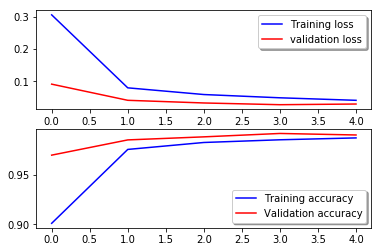

In [80]:

fig, ax = plt.subplots(2,1)

ax[0].plot(history_RMSProp.history['loss'], color='b', label="Training loss")
ax[0].plot(history_RMSProp.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_RMSProp.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history_RMSProp.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


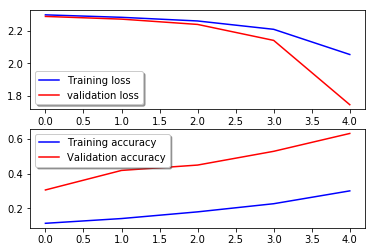

In [82]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history_SGD.history['loss'], color='b', label="Training loss")
ax[0].plot(history_SGD.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_SGD.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history_SGD.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)



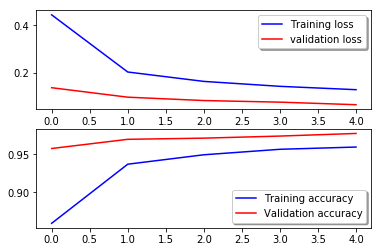

In [83]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history_Adagrad.history['loss'], color='b', label="Training loss")
ax[0].plot(history_Adagrad.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_Adagrad.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history_Adagrad.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

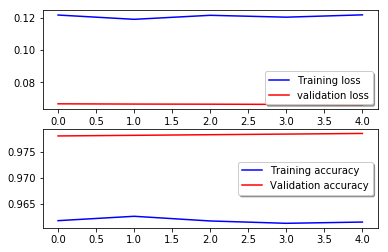

In [84]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history_Adadelta.history['loss'], color='b', label="Training loss")
ax[0].plot(history_Adadelta.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_Adadelta.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history_Adadelta.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)